# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [266]:
# Load pickled data
import pickle
import cv2

# TODO: Fill this in based on where you saved the training and testing data

rootFolder = 'traffic-signs-data'
training_file = rootFolder + '/train.p'
testing_file = rootFolder + '/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [267]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

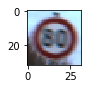

In [268]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

# TODO REMOVE AND DO SOMETHING LESS LAME
import random
import numpy as np
import matplotlib.pyplot as plt  

%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)





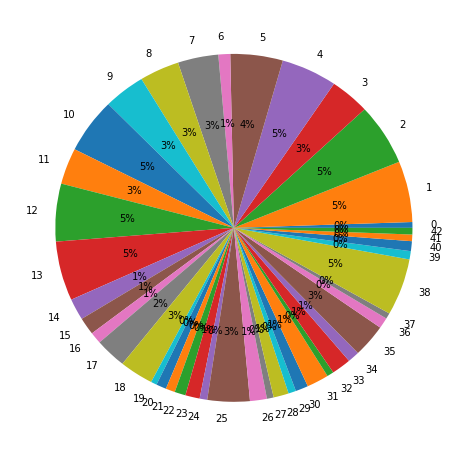

In [269]:
x_pie = y_train
y_pie = np.bincount(x_pie)
labels = np.nonzero(y_pie)[0]

plt.figure(figsize=(8,8))
plt.pie(y_pie, labels=labels,autopct='%1.1i%%')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

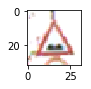

In [270]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from math import floor

# Keep it simple to start, but will likely need to do more intricate preprocessing

from sklearn.utils import shuffle

point = floor(0.5*len(X_train))

X_train, y_train = shuffle(X_train, y_train)

for image in X_train:
    image = cv2.normalize(image, dst=image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

X_train_full = X_train
y_train_full = y_train

X_train = X_train_full[0:point]
y_train = y_train_full[0:point]
X_validation = X_train_full[point:]
y_validation = y_train_full[point:]

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**


I found a dramatic increase in efficiency after normalizing the data. Many of these images were quite dark
and it seemed to do a fantastic job of increasing efficency once the images were normalized. 


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The first step was to shuffle the data to prevent any bias from the original ordering of data. Next, I picked a point to cut off the training data set. Everything up to this point would be used for training, and everything after for validation. I tried 25%, 50%, and 75% cut offs. I didnt notice a dramatic shift in effectiveness from moving this point. but 50% and 75% were a few percents better in accuracy than 25%. This was most likely due to having additional points to train on. 

In [271]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 2
BATCH_SIZE = 128


In [272]:
from tensorflow.contrib.layers import flatten

def TrafficSignNN(x):
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Layer 1: Activation
    conv1 = tf.nn.relu(conv1)
    
    # Pooling: Input 28x28x6. Output = 14x14x6
    conv1 = tf.nn.avg_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Layer 2: Convolutional. Input 14x14x6. Output 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # Layer 2: Activiation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling: Input 10x10x16. Output 5x5x16
    conv2 = tf.nn.avg_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten: Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Full Connected Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 3: Activation
    fc1 = tf.nn.sigmoid(fc1)
    
    # Layer 4: Input: 120. Output: 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Layer 4: Activation
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Input 84, Output = 43 (number of different signs)
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I'm still getting used to how NN's work. As such, my initial approach was just to reimplement the LeNet Architecture. However, I also noticed numerous other activation and pooling functions on the tensor flow docs pages. I first tried to replace the relu's with sigmoids and elu, functions. However, both of these functions made the accuracy decrease by a few percentage points. I reverted to relus for most of the functions but left one sigmoid as it seemed to give a slight edge in verification. I was careful to delete all the stored data and reset the instance each time to be sure it wasnt just retraining/overfitting data. I then changed from max_pooling to avg_pooling and saw a decent bump in performance so I left it as that. 

I was incredibly impressed by how well the LeNet architecture was able to work with minimal changes to its desgin. The two key areas to change were at the beginning and end. Because LeNet was made up of gray scale images, it original had 32x32x1 as an input which needed to be changed to 32x32x3. This meant the shape of the input needed to be adjusted as well. Also, there were 43 different traffic sign possibilities so we needed to shift the output as well. This was easy enough and only the shape and zeroes of this output needed to change. 

In [273]:
x = tf.placeholder(tf.float32, (None, 32,32,3))
x2 = tf.placeholder(tf.float32, (None, 32,32,3))
y = tf.placeholder(tf.int32, (None))
y2 = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [274]:
rate = 0.001

logits = TrafficSignNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [275]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [276]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.606

EPOCH 2 ...
Validation Accuracy = 0.828

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Again starting with the LeNet archectecutre I used an Adam Optimizer. The learning rate was initially set to 0.001. Out of curiosity, and knowing it would make everything worse, I set the learning rate to 0.1. This ended up with an extremly laughable accuracy and I quickly reverted to 0.001. I tried using a few different optimizers from the tensorflow documentation but without really knowing the background on these I kept getting poorer results, so I reverted to the Adam optimization. 

I kept the batch size at 128. I had increased and decreased it but did not see an extreme change it success. Increasing epochs showed diminishing returns and I was a bit worried about overfitting. I left the hyperparameters at their LeNet values as they seemed to be performing quite well. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

My solution was very much trial and error. After submitting this I plan on going back through the lectures. As I was implementing this and reading through the documention on tensor flow, the lectures began making much more sense. The discussion of things like shape, strides, hidden layers, and other topics began making a lot more sense once I could see it in action. Tweaking values and seeing the accuracy go up and down was quite satisfying and I finally felt like the lectures were clicking together. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [277]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from  scipy import ndimage
import numpy

#img_array = np.empty([0, 32, 32, 3], dtype = np.int32)
img_array = []

for file in os.listdir('signs'):
    if (file != '.DS_Store'):
        img = ndimage.imread('signs/' + file)
        #img = cv2.normalize(img, dst=image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        print(str(file))
        print(img.shape)
        #np.append(img_array, [img[:, :, :3]], axis = 0)
        img_array.append(img)

img_array = numpy.asarray(img_array)

s_yield = 13
s_speed_limit_30 = 1
s_speed_limit_50 = 2
s_keep_right = 38
s_left_or_straight = 37
label_array = numpy.array([s_yield,s_speed_limit_30,s_speed_limit_50,s_keep_right,s_left_or_straight])
    



sign1.png
(32, 32, 3)
sign2.png
(32, 32, 3)
sign3.png
(32, 32, 3)
sign4.png
(32, 32, 3)
sign5.png
(32, 32, 3)


In [282]:
def evaluate_soft(imgs, labels):
    prediction = tf.nn.softmax(logits)
    
    test_prediction = sess.run(tf.nn.top_k(
        prediction,k=3),feed_dict={x: imgs, y:labels})
    
    print('Predictions: {}'.format(test_prediction))
    return test_prediction

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(img_array, label_array)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    evaluate_soft(img_array, label_array)
    


Test Accuracy = 0.400
Predictions: TopKV2(values=array([[ 0.45888302,  0.44347817,  0.02497298],
       [ 0.14931287,  0.09477922,  0.08346806],
       [ 0.42842045,  0.39041957,  0.08598778],
       [ 0.81168365,  0.14846832,  0.02364238],
       [ 0.37564862,  0.33251595,  0.12466377]], dtype=float32), indices=array([[13, 12,  9],
       [42,  6,  5],
       [ 1,  2,  5],
       [38, 34, 36],
       [40, 39, 37]], dtype=int32))


**Answer:**

One of the most diffcult portions of this section was actually prepping the images for processing. To get small enough images, I used google maps to find some street signs and the screen capture on my mac to get the images. I then used gimp to convert the images down to a useable size which left a lot of pixelation. I also had to use gimp to remove the alpha layer of the images in order to be in the right dimensions. 

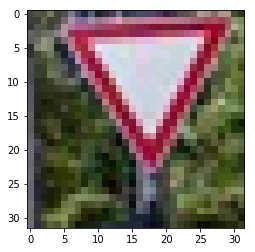

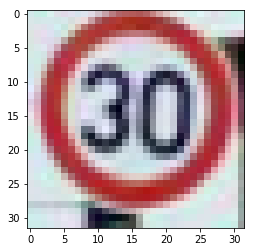

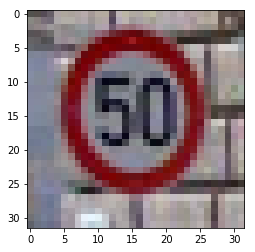

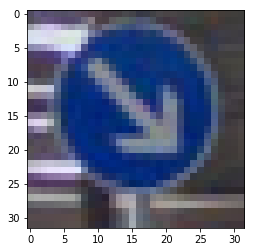

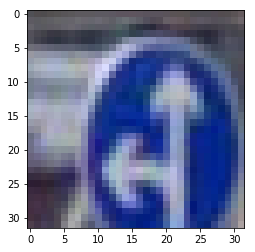

In [142]:
for img in img_array:
    img = cv2.normalize(img, dst=image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    
    


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My initial pass provided only a 40% accuracy (2 correct, 3 incorrect). To see what was going on, I wanted to proceed to the next step and try to find the top_k's from the softmax probabilities. 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.